1. Create a NumPy array P as follows,
P = [[1 2 3]
        [4 5 6]
        [7 8 9]
        [10 11 12]]
Create another NumPy array Q from the list [2,4,5,6,8,10,12,14,16,18,20,22]. Perform the matrix multiplication PxQ by reshaping Q appropriately. (2 points)

In [45]:
import numpy as np
P = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
given_list = [2,4,5,6,8,10,12,14,16,18,20,22]
Q = np.array(given_list).reshape(3,4)
print(Q)
M = np.matmul(P, Q)
print("Matrix Multiplication:",M)

[[ 2  4  5  6]
 [ 8 10 12 14]
 [16 18 20 22]]
Matrix Multiplication: [[ 66  78  89 100]
 [144 174 200 226]
 [222 270 311 352]
 [300 366 422 478]]


2. Create and print a randomly generated 1x20 matrix (A) using NumPy. Find and print the mean, 25th percentile, standard deviation, and sum of all the numbers in A. (2 points)

In [2]:
import numpy as np

A = np.random.rand(1, 20)

mean = np.mean(A)

stand_dev = np.std(A)

percentile_25 = np.percentile(A, 25)

sum = np.sum(A)

print("Mean: ", mean, "\nStd Deviation: ", stand_dev, "\n25th Percentile: ", percentile_25, "\nSum: ", sum)

Mean:  0.5376145408456712 
Std Deviation:  0.2626407345547099 
25th Percentile:  0.3621643258255174 
Sum:  10.752290816913423


3.Write a Python program to generate the following chart with the legend, title, x and y labels  (3 points)

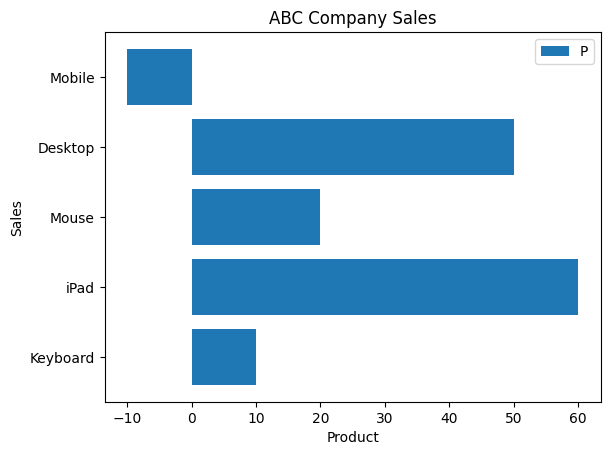

In [55]:
import matplotlib.pyplot as plt

y_Val = ['Keyboard', 'iPad', 'Mouse', 'Desktop', 'Mobile']
x_Val = [10, 60, 20, 50, -10]

plt.barh(y_Val, x_Val)
plt.title('ABC Company Sales')
plt.legend('Product')
plt.xlabel('Product')
plt.ylabel('Sales')
plt.show()

4. Create a pie chart like the one below, with labels and values specified in the table:

Course	Math	Science	History	Geography	English	Spanish
Scores (%)	12	10.3	32.55	20.25	10.7	14.2
Give each course a different color (not required to be the same as shown below), a title "Score Report”, display labels, and respective percentage values (in the format xx.x%) on the chart. (3 points)

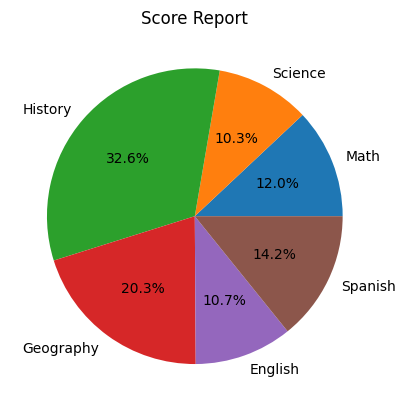

In [52]:
import matplotlib.pyplot as plt
import numpy as np

values = np.array([12, 10.3, 32.55, 20.25, 10.7, 14.2])
Labels = ["Math", "Science", "History", "Geography", "English", "Spanish"]

plt.subplot(title='Score Report')
plt.pie(values, labels = Labels, autopct='%1.1f%%')
plt.show()

5. Write a python program that plots the following in one pyplot figure with appropriate axis scales, as shown below (3 points)

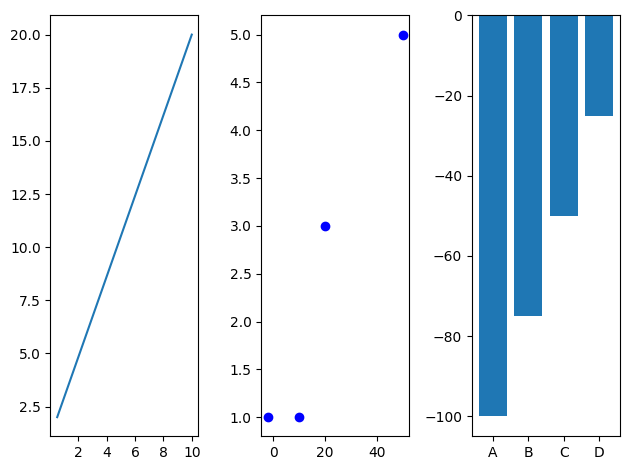

In [58]:
fig, (p, q, r) = plt.subplots(1, 3)
x_val = [0.5, 10]
y_val = [2, 20]
p.plot(x_val, y_val)
p.xaxis.set_ticks(np.arange(2, 12,2))

x_val = [-2, 10, 20, 50]
y_val = [1.0, 1.0, 3.0, 5.0]
q.scatter(x_val, y_val, c ="blue")

x_val = ["A", "B", "C", "D"]
y_val = [-100, -75, -50, -25]
r.bar(x_val, y_val)
fig.tight_layout()

plt.show()

6. Create a histogram with 7 bins for the prices: 304, 320, 333, 289, 298, 374, 323, 456, 312, 327, 344, and 325 . Provide an appropriate title, and x and y labels. (2 points)

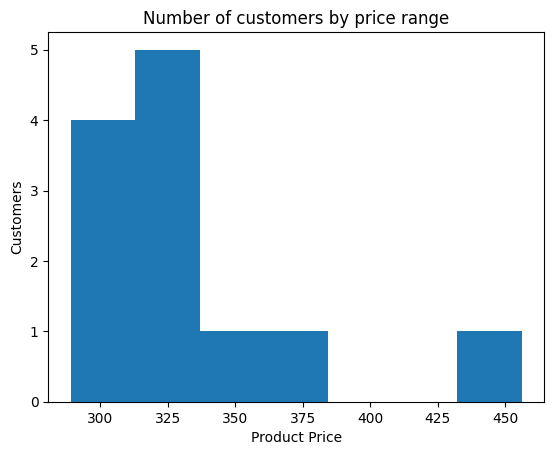

In [60]:
import matplotlib.pyplot as plt
import numpy as np

a = np.array([304, 320, 333, 289, 298, 374, 323, 456, 312, 327, 344, 325])

plt.hist(a, bins = 7)
plt.title("Number of customers by price range")
plt.xlabel("Product Price")
plt.ylabel("Customers")
plt.show()

7. Write a python program that connects to the MySQL database containing the company table which is imported from the company.sqlDownload company.sql script and do the following. (5 points)
  a) Display a pie chart of the top 5 sectors in the company by sales. 
  b) Display a scatter plot between sales and the number of employees (stored in the column num_employees) 

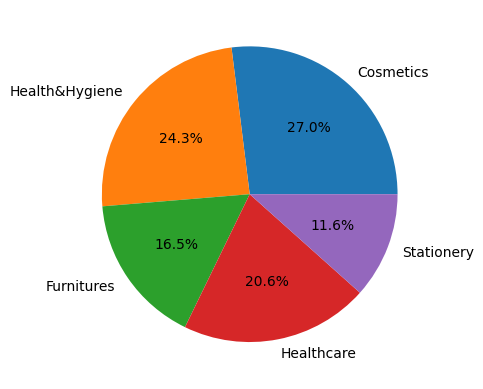

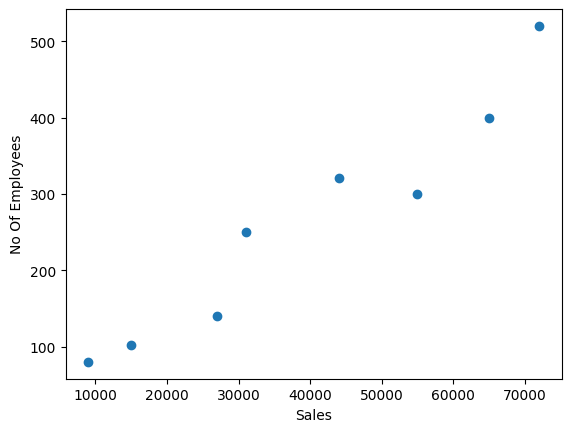

In [76]:
myvars = {}
with open("ssudala-mysql-password") as myfile:
    for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip()
        
        
import MySQLdb
conn = MySQLdb.connect(host="localhost", user=myvars['DB username'], passwd=myvars['DB password'], db=myvars['DB databasename'])
cursor = conn.cursor()
cursor.execute('select * from company');
rows = cursor.fetchall()


try:
    cursor.execute("SELECT sector, sales, num_employees FROM company")
    rows = cursor.fetchall()
    
    sales_1 = sorted(rows, reverse=True, key=lambda s: s[2])

    sales_circle = []
    labels_circle = []
    sales_total = []
    num_of_employees = []
    total = 0
    for xyz, row in enumerate(sales_1):
        if xyz <= 4:
            labels_circle.append(row[0])
            sales_circle.append(row[1])
            total += row[1]
        sales_total.append(row[1])
        num_of_employees.append(row[2])


    for xyz, sale in enumerate(sales_circle):
        sales_circle[xyz] = sale / total
    plt.pie(sales_circle, labels = labels_circle, autopct='%1.1f%%')
    plt.show()
    plt.scatter(sales_total, num_of_employees)
    plt.xlabel('Sales')
    plt.ylabel('No Of Employees')
    plt.show()


except Exception as e:
    print(e)